**Elevate Labs Internship Task 1**

Dataset Cleaning and Preprocessing for Titanic Dataset


`1. Imports & Data Loading`

**Explanation**:

We bring in pandas and numpy because they are the standard Python libraries for working with tabular data and arrays.

matplotlib.pyplot is our basic plotting library.

seaborn is only used here to quickly fetch a Titanic dataset example. If you have the CSV file titanic.csv (downloaded from Kaggle), you should replace that line with pd.read_csv('titanic.csv').

StandardScaler from sklearn.preprocessing will let us standardize numeric columns later.

In [2]:
# ---------------------------------------------------------
# 1. IMPORT LIBRARIES
# ---------------------------------------------------------
# We will use:
#  - pandas / numpy for data manipulation
#  - matplotlib.pyplot for plotting
#  - seaborn only to load the built‐in Titanic dataset (or
#    you can swap to pd.read_csv if you have a local CSV).
#  - sklearn.preprocessing for scaling
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  # only to load demo Titanic dataset
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# 2. LOAD DATASET
# ---------------------------------------------------------
# Option A: If you have downloaded the Kaggle Titanic CSV:
#    df = pd.read_csv('titanic.csv')
#
# Option B: For demonstration here, we load seaborn’s Titanic:
df = sns.load_dataset('titanic')

# Verify the dataset loaded successfully:
print("✅ Titanic dataset loaded.  Number of rows × columns:", df.shape)


✅ Titanic dataset loaded.  Number of rows × columns: (891, 15)


`2. Initial Peek: head(), tail(), shape, info()`

**Explanation**:

df.head() and df.tail() let you inspect the top and bottom of the table, so you immediately see columns like survived, pclass, sex, age, etc.

df.shape reminds you how many total rows and columns you have.

df.info() shows data types (e.g., int64, float64, object) and how many values are non‐null. If you see fewer non-null than the total number of rows, that means there are missing values.

df.describe() prints count/mean/std/min/25%/50%/75%/max for each numeric column.

df.head() and df.tail() let you inspect the top and bottom of the table, so you immediately see columns like survived, pclass, sex, age, etc.

df.shape reminds you how many total rows and columns you have.

df.info() shows data types (e.g., int64, float64, object) and how many values are non‐null. If you see fewer non-null than the total number of rows, that means there are missing values.

df.describe() prints count/mean/std/min/25%/50%/75%/max for each numeric column.

In [3]:
# ---------------------------------------------------------
# 3. VIEW FIRST AND LAST FEW ROWS
# ---------------------------------------------------------
#  - head(): shows the first 5 rows (by default).
#  - tail(): shows the last 5 rows (by default).
#  This helps us see the column names & some sample values.

print(">>> First 5 rows:")
display(df.head())

print("\n>>> Last 5 rows:")
display(df.tail())

# ---------------------------------------------------------
# 4. CHECK SHAPE AND DATA TYPES
# ---------------------------------------------------------
#  - shape: returns a tuple (number_of_rows, number_of_columns).
#  - info(): shows each column name, its data type, and count of non-NA values.
#  - describe(): summary stats on numeric columns (mean, std, min, max, quartiles).

print(f"\nDataset shape (rows × cols): {df.shape}")

print("\nDataset info:")
df.info()

print("\nNumerical summary (describe):")
display(df.describe())


>>> First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



>>> Last 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True



Dataset shape (rows × cols): (891, 15)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Numerical summary (desc

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`3. Unique Values & Missing‐Value Counts`

**Explanation**:

We isolate columns that hold text or categories (dtype object or category). For each, calling df[col].unique() lists all distinct entries (e.g., embarked might have [‘S’, ‘C’, ‘Q’, NaN]).

df.isnull().sum() tells us, for each column, exactly how many rows are missing (NaN). This is crucial for planning how to impute or drop.

In [4]:
# ---------------------------------------------------------
# 5. LIST UNIQUE VALUES FOR CATEGORICAL COLUMNS
# ---------------------------------------------------------
#  - We find which columns are dtype 'object' or 'category'.
#  - Then we print the unique values in each such column.
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols, "\n")

for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f" • {col:12s}: {unique_vals}")

# ---------------------------------------------------------
# 6. COUNT MISSING VALUES PER COLUMN
# ---------------------------------------------------------
#  - df.isnull().sum() shows how many NaNs each column has.
print("\nMissing values per column:")
display(df.isnull().sum())


Categorical columns: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'] 

 • sex         : ['male' 'female']
 • embarked    : ['S' 'C' 'Q' nan]
 • class       : ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
 • who         : ['man' 'woman' 'child']
 • deck        : [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
 • embark_town : ['Southampton' 'Cherbourg' 'Queenstown' nan]
 • alive       : ['no' 'yes']

Missing values per column:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


`4. Handling Missing Values`

**Explanation**:

age: We replace missing ages with the median of the observed ages. We use median (rather than mean) because it is less influenced by extreme ages (e.g., infants and very old passengers).

embarked: A handful of missing values → we fill them with the mode (most frequent port of embarkation).

embark_town: Similar to embarked, but spelled out. We fill with mode so it no longer has nulls—though ultimately we will drop it as redundant.

deck: Over 75% of entries are null → we drop the entire column because we cannot trust any statistical imputation.

who, adult_male, alive, alone: These are derived from other columns (e.g., who is essentially a combination of sex+age, alive is a text version of survived). We drop them for simplicity.



In [5]:
# ---------------------------------------------------------
# 7. HANDLE MISSING VALUES
#
# Strategy per column (commonly used for Titanic):
#  - age: many missing → fill with median age
#  - embarked: small number missing → fill with mode (most frequent port)
#  - embark_town: same info as ‘embarked’ (redundant) → fill with mode (temporary) then drop
#  - deck: over 75% missing → drop entire column
#  - who, adult_male, alive, alone: derived/duplicated columns → drop
# ---------------------------------------------------------

# 7a. Show missing counts again (for reference)
print("Before imputation/dropping, missing counts:")
display(df.isnull().sum())

# 7b. Fill 'age' missing values with median
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)

# 7c. Fill 'embarked' with mode (most frequent)
embarked_mode = df['embarked'].mode()[0]
df['embarked'].fillna(embarked_mode, inplace=True)

# 7d. Fill 'embark_town' with mode (we’ll drop it later)
embark_town_mode = df['embark_town'].mode()[0]
df['embark_town'].fillna(embark_town_mode, inplace=True)

# 7e. Drop 'deck' column because >75% values are missing (not useful)
df.drop('deck', axis=1, inplace=True)

# 7f. Drop derived/redundant columns: 'who', 'adult_male', 'alive', 'alone'
df.drop(['who', 'adult_male', 'alive', 'alone'], axis=1, inplace=True)

# 7g. After filling/dropping, show missing counts again
print("\nAfter filling/dropping some columns, missing counts:")
display(df.isnull().sum())


Before imputation/dropping, missing counts:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0



After filling/dropping some columns, missing counts:


<ipython-input-5-b0d460173e74>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(age_median, inplace=True)
<ipython-input-5-b0d460173e74>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
embark_town,0


`5. Dropping Redundant or Overly Sparse Columns`

**Explanation**:

embark_town duplicates embarked, so we drop it now.

class is the same information as pclass (First/Second/Third vs. 1/2/3). We keep numeric pclass because it is easier for modeling and drop the text column class.



In [6]:
# ---------------------------------------------------------
# 8. DROP ADDITIONAL REDUNDANT COLUMNS
#
#  - 'embark_town' was filled but is redundant with 'embarked'
#  - 'class' is text version of 'pclass'
#  - We keep 'pclass' (numeric: 1/2/3) and drop 'class'
# ---------------------------------------------------------

df.drop(['embark_town', 'class'], axis=1, inplace=True)

# Show which columns remain after all dropping:
print("Columns remaining after dropping:")
print(df.columns.tolist())


Columns remaining after dropping:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


`6. Encoding Categorical Variables`

**Explanation**:

For binary "sex", a simple mapping suffices.

For "embarked", we create dummy variables. If embarked was {'C', 'Q', 'S'}, then after get_dummies (with drop_first=True) there will be columns embarked_Q and embarked_S. If both are 0, that row implicitly belongs to 'C'.

In [7]:
# ---------------------------------------------------------
# 9. ENCODE CATEGORICAL COLUMNS
#
#  - 'sex': label‐encode → male=0, female=1
#  - 'embarked': one‐hot encode, drop_first=True (to avoid dummy‐variable trap)
# ---------------------------------------------------------

# 9a. Label‐encode 'sex' → male=0, female=1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# 9b. One‐hot encode 'embarked' (categories: 'C', 'Q', 'S')
#     Setting drop_first=True yields two columns: 'embarked_Q', 'embarked_S'
#     (Passsengers with neither get implied 'embarked_C'.)
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

print("Data AFTER encoding categorical variables (first 5 rows):")
display(df.head())


Data AFTER encoding categorical variables (first 5 rows):


,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


`7. Feature Engineering`

**Explanation**:

sibsp = number of siblings/spouses aboard; parch = number of parents/children aboard.

We combine them into a single column family_size = sibsp + parch + 1.

We then drop the two original columns because family_size captures the same information in a single numeric feature.

In [8]:
# ---------------------------------------------------------
# 10. FEATURE ENGINEERING: Create 'family_size'
#   family_size = sibsp (siblings/spouses aboard)
#                 + parch (parents/children aboard)
#                 + 1 (the passenger themself)
#   Rationale: Family size sometimes correlates with survival chances.
# ---------------------------------------------------------

df['family_size'] = df['sibsp'] + df['parch'] + 1

# Drop original 'sibsp' and 'parch' since they are now represented by 'family_size'
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

print("Data AFTER creating 'family_size' and dropping 'sibsp' & 'parch':")
display(df.head())


Data AFTER creating 'family_size' and dropping 'sibsp' & 'parch':


,survived,pclass,sex,age,fare,embarked_Q,embarked_S,family_size
0,0,3,0,22.0,7.2500,False,True,2
1,1,1,1,38.0,71.2833,False,False,2
2,1,3,1,26.0,7.9250,False,True,1
3,1,1,1,35.0,53.1000,False,True,2
4,0,3,0,35.0,8.0500,False,True,1


`8. Scaling / Normalizing Numerical Features`

**Explanation**:

StandardScaler subtracts each value by the column’s mean, then divides by the column’s standard deviation.

After fitting & transforming, both age and fare will have mean very close to 0 and standard deviation very close to 1.

Standardizing helps many ML algorithms converge faster and weigh features on the same scale.

In [9]:
# ---------------------------------------------------------
# 11. SCALE NUMERICAL FEATURES USING STANDARD SCALER
#    We will scale 'age' and 'fare' so that each has mean≈0 and std≈1.
# ---------------------------------------------------------
numeric_cols_to_scale = ['age', 'fare']

scaler = StandardScaler()
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

print("Data AFTER scaling 'age' and 'fare' (first 5 rows):")
display(df[['age', 'fare']].head())

# Confirm scaled mean ≈ 0 and std ≈ 1:
print("\nScaled 'age' mean:  {:.5f},  std:  {:.5f}".format(
    df['age'].mean(), df['age'].std()))
print("Scaled 'fare' mean: {:.5f},  std:  {:.5f}".format(
    df['fare'].mean(), df['fare'].std()))

Data AFTER scaling 'age' and 'fare' (first 5 rows):


,age,fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337



Scaled 'age' mean:  0.00000,  std:  1.00056
Scaled 'fare' mean: 0.00000,  std:  1.00056


`9. Detecting & Removing Outliers (IQR Method)`

**Explanation**:

We compute Q1 and Q3 on the already scaled fare column.

The Interquartile Range (IQR) is Q3 – Q1.

Anything below (Q1 – 1.5·IQR) or above (Q3 + 1.5·IQR) is a statistical “outlier.”

We create df_no_outliers by filtering out those rows.

Finally, we draw a boxplot of the cleaned fare to confirm no extreme whiskers remain.

Scaled Fare: Q1=-0.49, Q3=-0.02, IQR=0.46
Scaled Fare Bounds: [-1.19, 0.67]

Rows before outlier removal: 891
Rows after  outlier removal: 775
Number of rows removed: 116


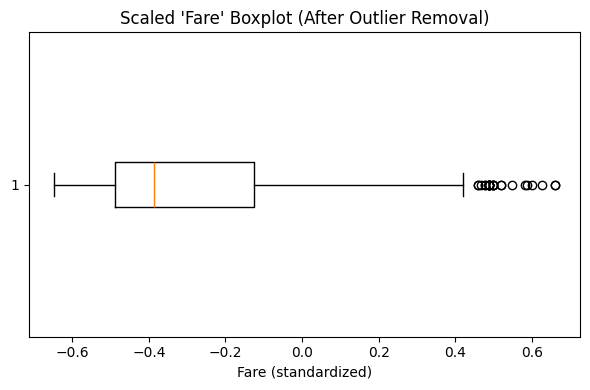

In [11]:
# ---------------------------------------------------------
# 12. DETECT & REMOVE OUTLIERS ON SCALED 'fare' USING IQR METHOD
#    1. Compute Q1 (25th percentile) and Q3 (75th percentile)
#    2. IQR = Q3 - Q1
#    3. Lower bound = Q1 - 1.5 * IQR
#       Upper bound = Q3 + 1.5 * IQR
#    4. Filter out any rows where 'fare' is outside [lower, upper]
# ---------------------------------------------------------

# 12a. Compute quartiles on scaled 'fare'
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Scaled Fare: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
print(f"Scaled Fare Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

# 12b. Count rows before removal
initial_rows = df.shape[0]

# 12c. Filter to keep only rows within the bounds
df_no_outliers = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)].copy()

final_rows = df_no_outliers.shape[0]
print(f"\nRows before outlier removal: {initial_rows}")
print(f"Rows after  outlier removal: {final_rows}")
print(f"Number of rows removed: {initial_rows - final_rows}")

# 12d. Visualize a boxplot of scaled 'fare' AFTER outlier removal
plt.figure(figsize=(6, 4))
plt.boxplot(df_no_outliers['fare'], vert=False)
plt.title("Scaled 'Fare' Boxplot (After Outlier Removal)")
plt.xlabel("Fare (standardized)")
plt.tight_layout()
plt.show()


`10. Final Cleaned DataFrame Preview & Save`

**Explanation**:

We show the first five rows of df_no_outliers, which is now fully cleaned, with no missing values, all categorical columns encoded, numeric features scaled, and outliers removed.

The shape tells you how many rows remain after removing outliers.

If you need to train a model, you can export df_no_outliers to a CSV and use that in your training pipeline.

In [13]:
# ---------------------------------------------------------
# 13. PREVIEW FINAL CLEANED DATAFRAME AND SAVE (OPTIONAL)
# ---------------------------------------------------------

print(">>> Final cleaned dataset (first 5 rows):")
display(df_no_outliers.head())

print(f"\n>>> Final cleaned dataset shape: {df_no_outliers.shape}  (rows × columns)")

# (Optional) If you want to save to CSV for model training:
df_no_outliers.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned dataset saved as 'titanic_cleaned.csv'.")


>>> Final cleaned dataset (first 5 rows):


,survived,pclass,sex,age,fare,embarked_Q,embarked_S,family_size
0,0,3,0,-0.565736,-0.502445,False,True,2
2,1,3,1,-0.258337,-0.488854,False,True,1
3,1,1,1,0.433312,0.420730,False,True,2
4,0,3,0,0.433312,-0.486337,False,True,1
5,0,3,0,-0.104637,-0.478116,True,False,1



>>> Final cleaned dataset shape: (775, 8)  (rows × columns)
Cleaned dataset saved as 'titanic_cleaned.csv'.
